In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv("Salary_Data.csv")
data.dropna(inplace=True)
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


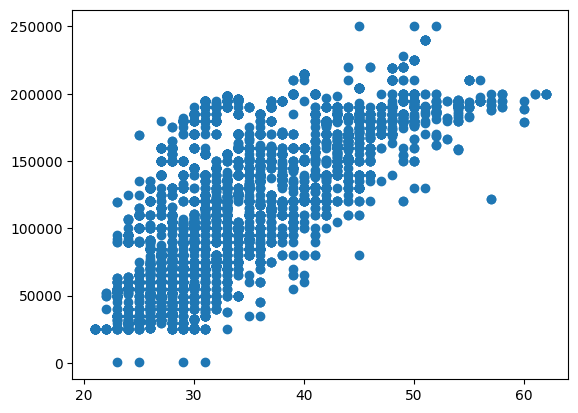

In [92]:
plt.scatter(data['Age'],data['Salary'])
plt.show()

In [93]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
pridict = km.fit_predict(data[['Age','Salary']])
# pridict = km.predict([[18,'90000']])
print(f"Pridicted values: {pridict}")

Pridicted values: [2 0 1 ... 0 2 0]


In [94]:
data['cluster'] = pridict
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,cluster
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,2
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1


In [95]:
km.cluster_centers_

array([[2.77760879e+01, 5.66356088e+04],
       [4.05114219e+01, 1.78134928e+05],
       [3.31948765e+01, 1.17255000e+05]])

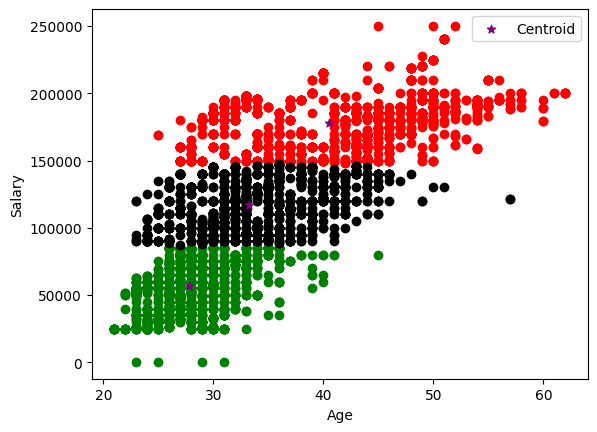

In [96]:
cluster0 = data[data.cluster==0]
cluster1 = data[data.cluster==1]
cluster2 = data[data.cluster==2]
plt.scatter(cluster0.Age,cluster0['Salary'],color='green')
plt.scatter(cluster1.Age,cluster1['Salary'],color='red')
plt.scatter(cluster2.Age,cluster2['Salary'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaller = MinMaxScaler()
scaller.fit(data[['Salary']])
data['Salary'] = scaller.transform(data[['Salary']])

scaller.fit(data[['Age']])
data['Age'] = scaller.transform(data[['Age']])

In [99]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,cluster
0,0.268293,Male,Bachelor's,Software Engineer,5.0,0.359103,2
1,0.170732,Female,Master's,Data Analyst,3.0,0.258963,0
2,0.585366,Male,PhD,Senior Manager,15.0,0.599439,1
3,0.365854,Female,Bachelor's,Sales Associate,7.0,0.238935,0
4,0.756098,Male,Master's,Director,20.0,0.799720,1


In [100]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
pridict = km.fit_predict(data[['Age','Salary']])
# pridict = km.predict([[18,'90000']])
print(f"Pridicted values: {pridict}")

Pridicted values: [0 0 2 ... 0 2 0]


In [101]:
data['cluster'] = pridict
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,cluster
0,0.268293,Male,Bachelor's,Software Engineer,5.0,0.359103,0
1,0.170732,Female,Master's,Data Analyst,3.0,0.258963,0
2,0.585366,Male,PhD,Senior Manager,15.0,0.599439,2
3,0.365854,Female,Bachelor's,Sales Associate,7.0,0.238935,0
4,0.756098,Male,Master's,Director,20.0,0.799720,2


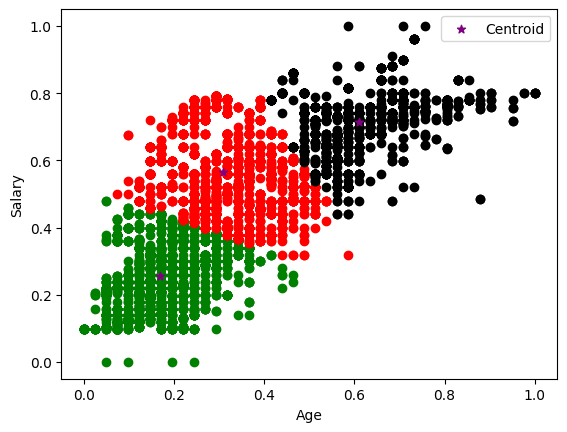

In [102]:
cluster0 = data[data.cluster==0]
cluster1 = data[data.cluster==1]
cluster2 = data[data.cluster==2]
plt.scatter(cluster0.Age,cluster0['Salary'],color='green')
plt.scatter(cluster1.Age,cluster1['Salary'],color='red')
plt.scatter(cluster2.Age,cluster2['Salary'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [105]:
see = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Salary']])
    see.append(km.inertia_)

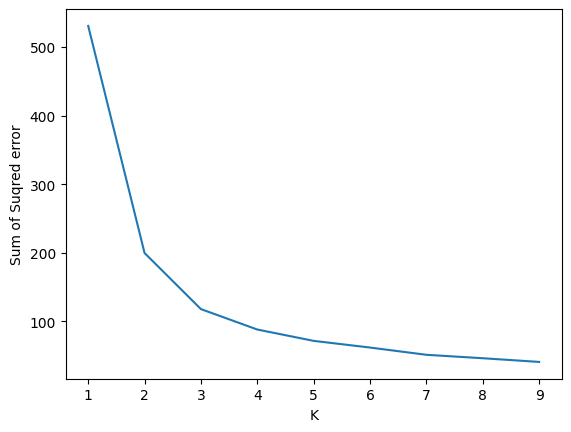

In [106]:
plt.xlabel('K')
plt.ylabel('Sum of Suqred error')
plt.plot(k_range,see)